<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/Ds_exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Data Science, 2022**

Experiment 4

Name - Rishi Kaul

UID - 2018130019

###**Objective**: 

Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank etc)

### **Theory** :

**Statistical Analysis**

Statistical analysis is done for three reasons:

1. Descriptive Statistics - What does the data tell us?

2. Building and Using Models - Can the data be used to estimate values or predict the future?

3. Hypothesis Testing - Are the descriptive statistics and models just coincidence for this sample?

**Descriptive Statistics**

Descriptive Statistics are calculations used to describe or summarize a collection of data. This is, by far, the most common type of statistical analysis that a practicing engineer will ever do

Descriptive Statistics can be grouped into few categories, each seeking to answer a certain question based on the data.

- Amount and Frequency Statistics - How much and how often? sum, count, and percent

- Central Tendency Statistics - What is typical? mean, median, and mode.

- Dispersion Statistics - What is the variation? minimum, maximum, variance, standard deviaion, skew, and quantile (also called percentile).

**Hypothesis Testing**

Hypothesis tests are calculation to determine if Descriptive Statistics and Statistical Models are just coincidence for the data sample. For example, suppose we want to know the difference in average height for male and female college students. We can collect a sample of data and compare the mean values. But is the result the true difference or is it just a coincidence of the sample that we happened to observe? In other words, if we were to collect more data might we get a different result? Statisticians have devised a way to calculate the probability of whether the observed descriptive statistic or model is merely a coincidence through hypothesis. The hypothesis calculation is based on the data sample itself, so hypothesis conclusions must be qualified with nuanced words of probability, such as maybe, likely, and probably.

#### **Case study** : 

Graduate Admission Predictions – As per the objective, this project is to predict the chances of getting a seat in an international university with respect to several attributes which are discussed below.

"Hypothesis Testing" will help us to determine possible relationships between the chances of getting admission at the university and other features.

**Attribute Information:**

1. Serial No.
2. GRE [Graduate Record Examinations] Scores ( out of 340 ).
3. TOEFL [Test of English as a Foreign Language] Scores ( out of 120 ).
4. University Rating ( out of 5 ).
5. SOP [Statement of Purpose].
6. LOR [Letter of Recommendation Strength] ( out of 5 ).
7. CGPA [Cumulative Grade Points Average] ( out of 10 ).
8. Research ( either 0 or 1 ).
9. Chance of Admit ( ranging from 0 to 1 ).




In [ ]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
# Connecting/Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab Notebooks/DS/Labs/Exp4

/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp4


### **1. Load the dataset (Use pandas )**

In [ ]:
# Reading the training dataset
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### **2. Exploratory Data Analysis of the dataset**

In [ ]:
# Checking the shape of the dataset
data.shape

(500, 9)

In [ ]:
# Check for null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Deleting the unwanted column
del data['Serial No.']

In [ ]:
# statistics on numerical data
data.describe()  

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Here we can have a overview of the data we have i.e the minimum, maximum, mean of a numeric column, its standard deviation, etc.

### **Divide The categorical, discrete & numerical Features**

In [ ]:
# Classifying the features as categorical, discrete and continuous features
Cat_features = [feature for feature in data.columns if data[feature].dtypes=='O']
print("Categorical features are :",Cat_features)

Discrete_features = [feature for feature in data.columns if data[feature].dtypes=='int64']
print("Discret features features are :",Discrete_features)

Continuous_features = [feature for feature in data.columns if data[feature].dtypes=='float64']
print("Continous features features are :",Continuous_features)

Categorical features are : []
Discret features features are : ['GRE Score', 'TOEFL Score', 'University Rating', 'Research']
Continous features features are : ['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']


In [ ]:
# Checking frequency of unqiue values in each column
df = pd.DataFrame(columns = ['Column', 'Mean', 'Median', 'Mode'])
for col in Continuous_features:
    df = df.append({'Column': col, 'Mean': data[col].mean(), 'Median': data[col].median(), 'Mode': data[col].mode()[0]}, ignore_index=True)
df

,Column,Mean,Median,Mode
0,SOP,3.37400,3.50,4.00
1,LOR,3.48400,3.50,3.00
2,CGPA,8.57644,8.56,8.00
3,Chance of Admit,0.72174,0.72,0.71


Here we can see that most of the people have 8 CPGA, 4 SOP score and 3 LORS. While the mean rate of acceptance of admmit is 72%.

In [ ]:
for col in data.columns:
    print(data[col].value_counts())

312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5  

In [ ]:
#Check for duplicates
dups = data[data.duplicated()].shape[0]
print('No. of duplicates : ', dups)

No. of duplicates :  0


### **Univariate Analysis :-**

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

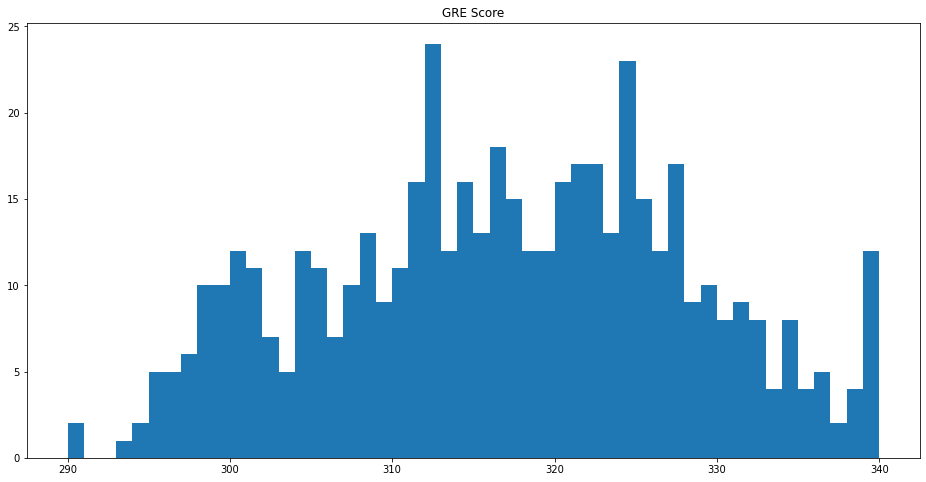

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'GRE Score'
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of GREScore, we can say that highest number of the students GREscore is "312" & "324".<br>
 Highest GREScore of students is between "304" & "330".
<br></p>

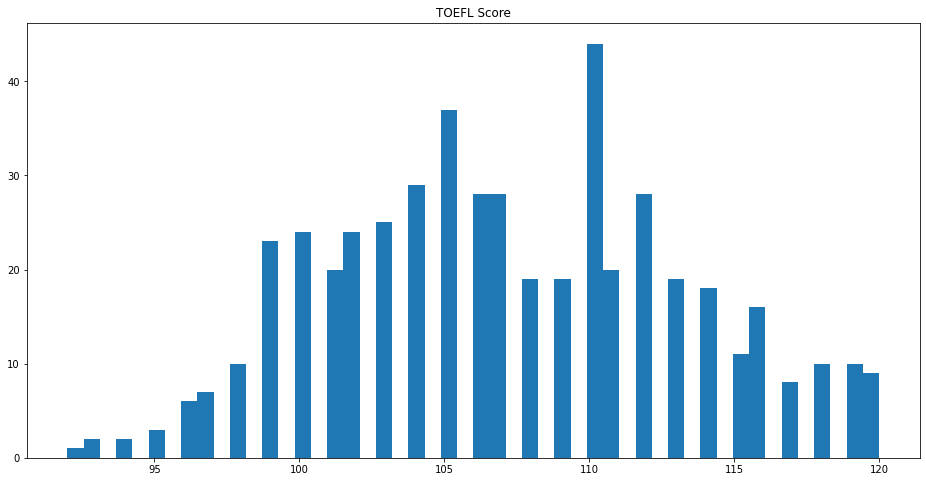

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'TOEFL Score'
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of TOEFLScore, we can say that highest number of the students TOEFLscore is "110" & "105".<br>
 Highest TOEFLScore of students is between "99" & "115".
<br></p>

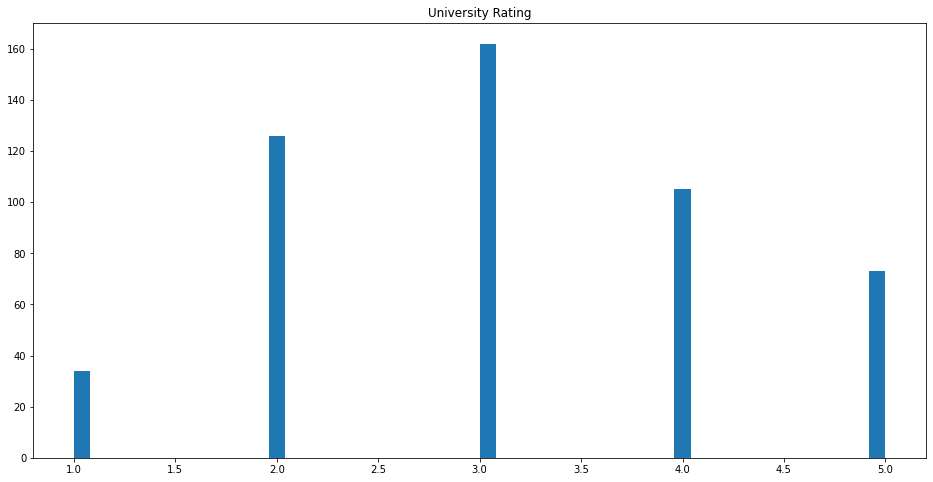

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x ='University Rating'
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of University Rating, we can say that highest number of the University rating is "2" & "3".
<br></p>

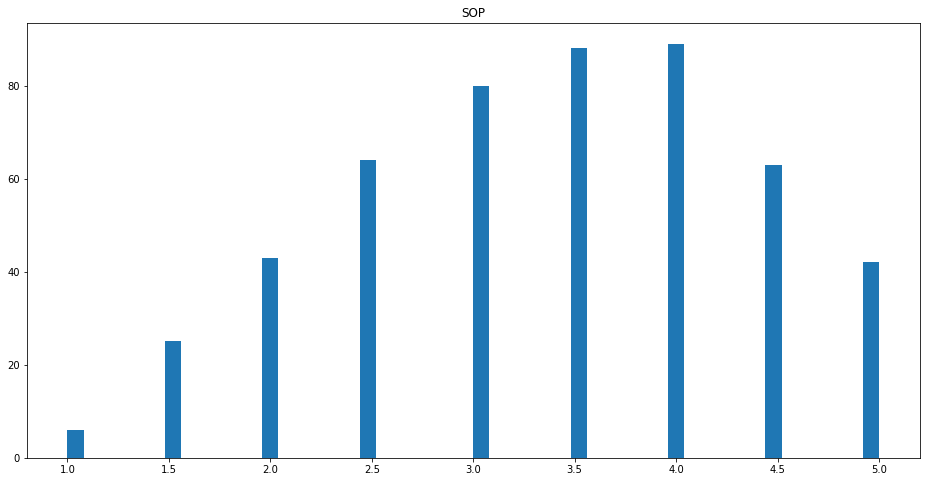

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'SOP'
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of SOP, we can say that highest number of the Statement of purpose is  between "2.5" & "4.5".
<br></p>

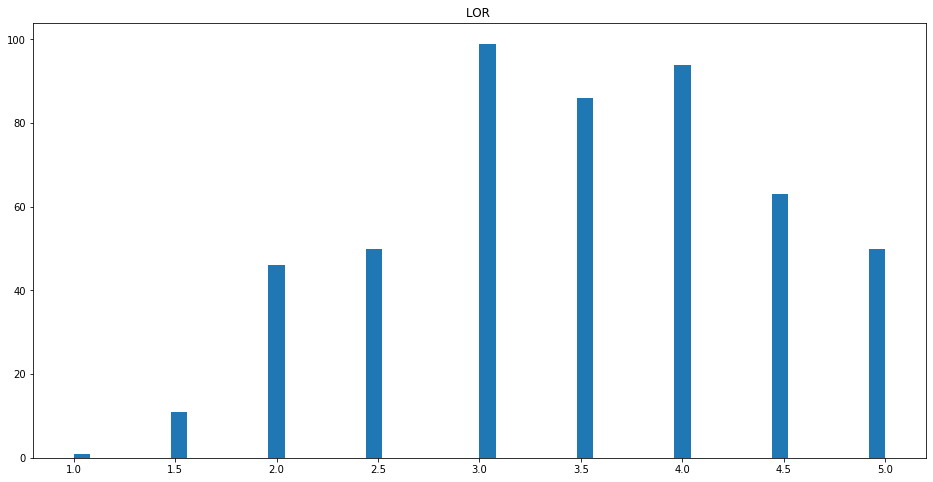

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'LOR '
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of LOR, we can say that highest number of the Letter of recommendation (LOR) is between "2.5" & "4.5".
<br></p>

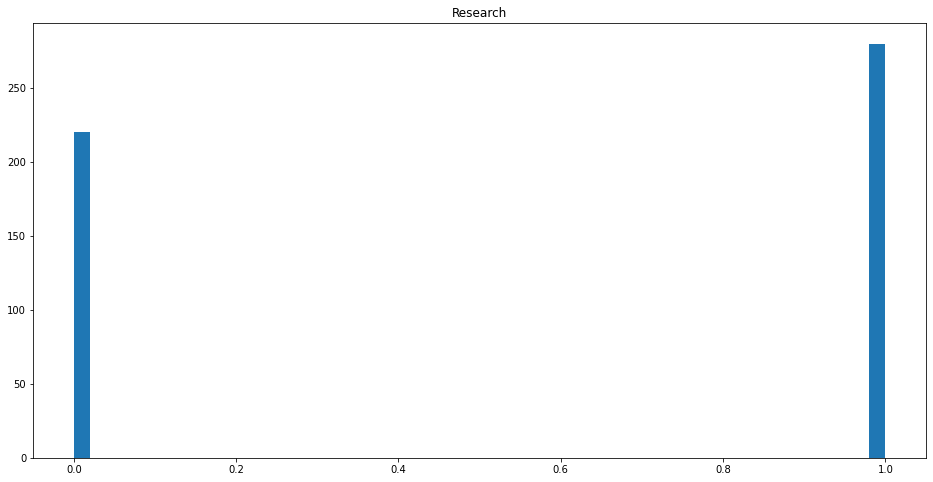

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'Research'
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of Research, we can say that highest number of the students Research is "1".
<br></p>

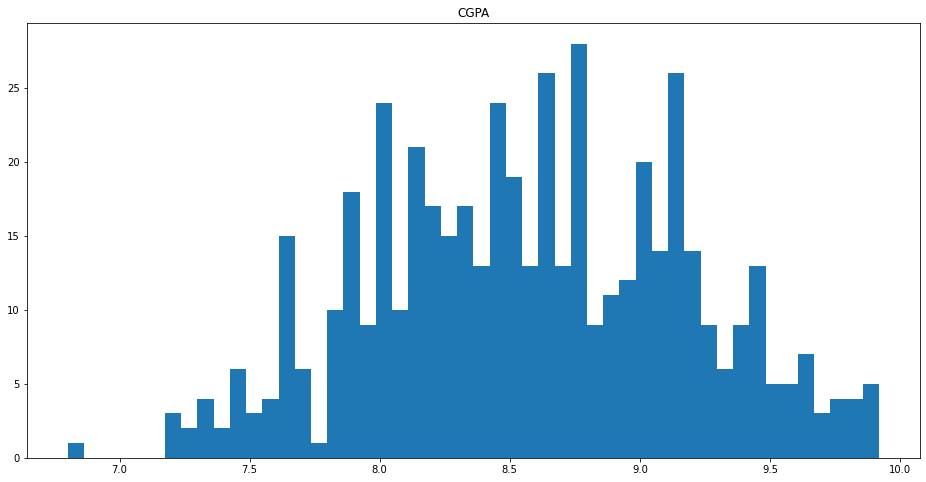

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'CGPA'
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

**Insights** - By analyzing the distribution of CGPA, we can say that majority of students have got a CGPA between 8 and 9.


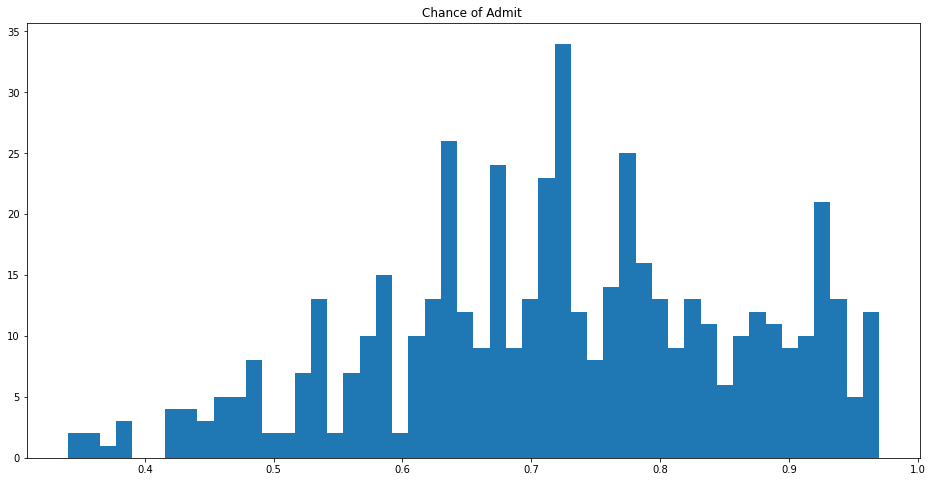

In [ ]:
# Checking for outliers in these columns by plotting the histplot

x = 'Chance of Admit '
plt.figure(figsize=(16,8))
plt.hist(data[x], bins=50, label=x)
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>By analyzing the distribution of ChanceOfAdmit, we can say that highest percentage of the getting admission at the university is between "0.6" & "1.0".
<br></p>

### **Bivariate Analysis :-**

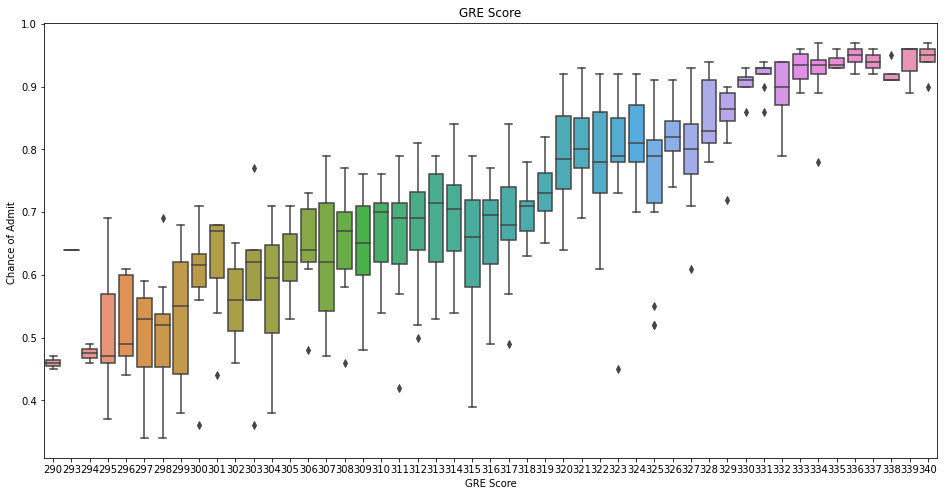

In [ ]:
x = 'GRE Score'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

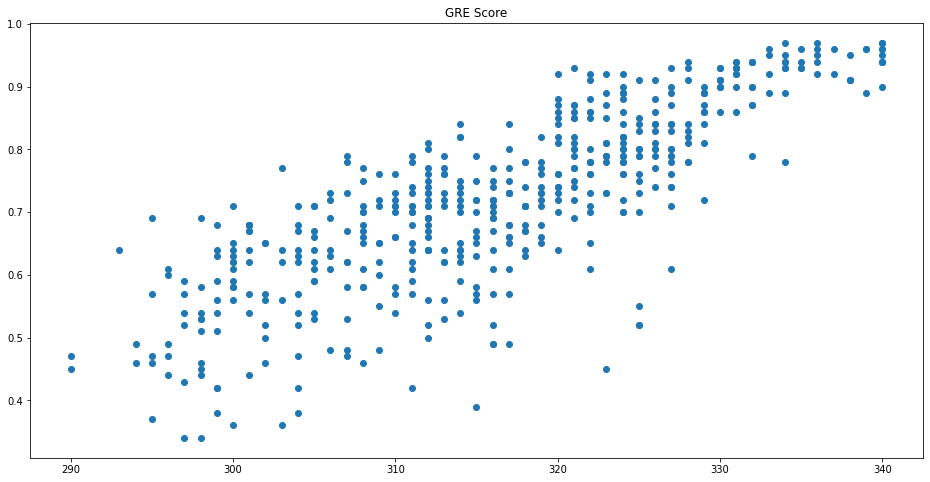

In [ ]:
x = 'GRE Score'
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>There is a strong positive relationship between GRE Score and ChanceOfAdmit.
<br></p>

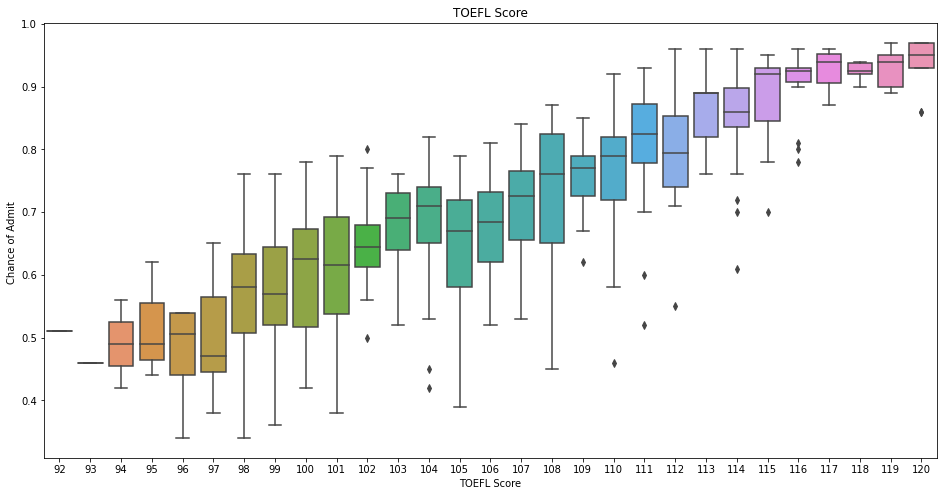

In [ ]:
x = 'TOEFL Score'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

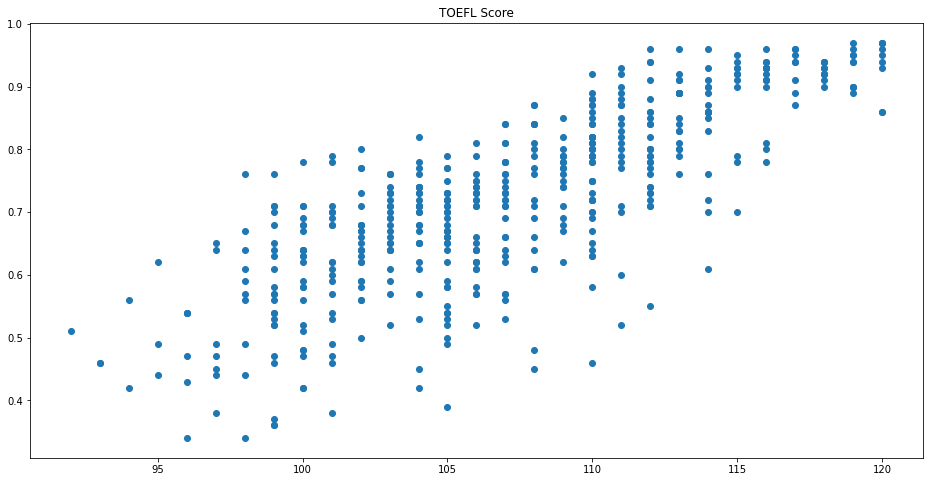

In [ ]:
x = 'TOEFL Score'
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>There is a strong positive relationship between TOEFLScore and ChanceOfAdmit.
<br></p>

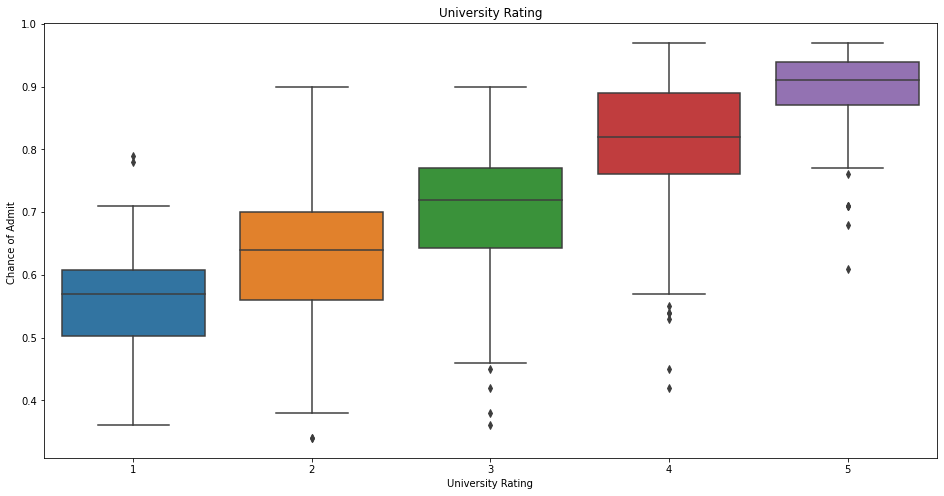

In [ ]:
x = 'University Rating'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

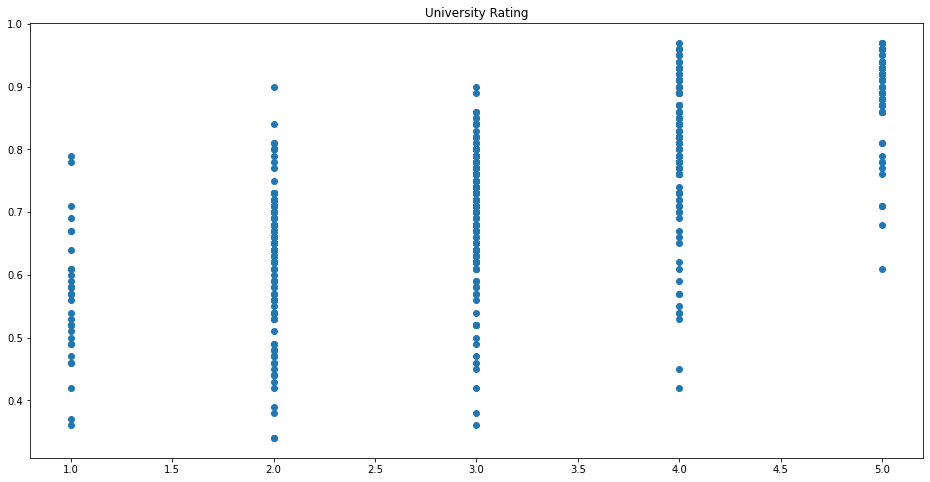

In [ ]:
x = 'University Rating'
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b> Since there are many outliers we can't be fully sure that there is a strong relationship but we can say that there is a slight positive influence between University Rating and ChanceOfAdmit. 
<br></p>

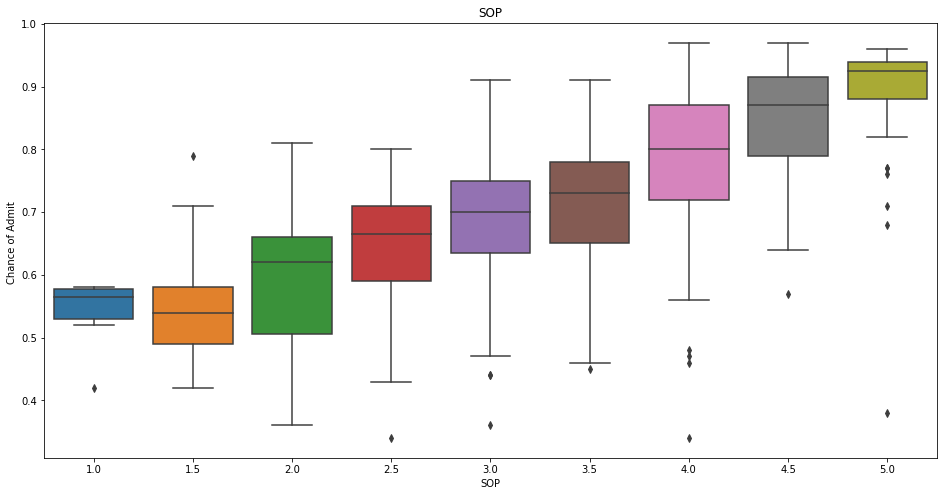

In [ ]:
x = 'SOP'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

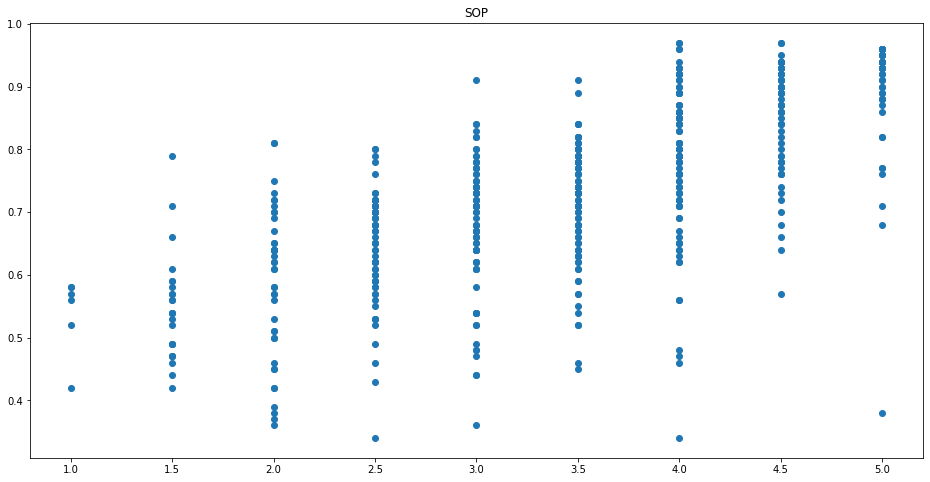

In [ ]:
x = 'SOP'
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b> Since there are many outliers we can't be fully sure that there is a strong relationship but we can say that there is a slight positive influence between SOP and ChanceOfAdmit.
<br></p>

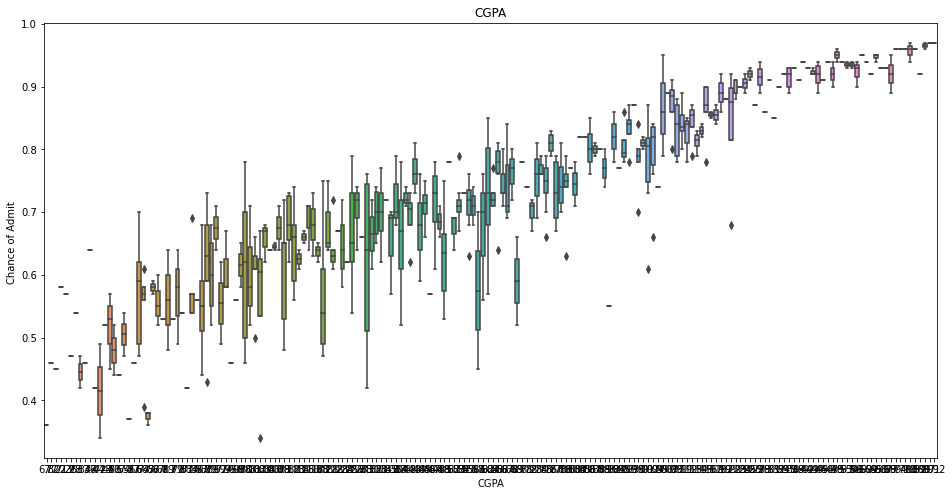

In [ ]:
x = 'CGPA'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

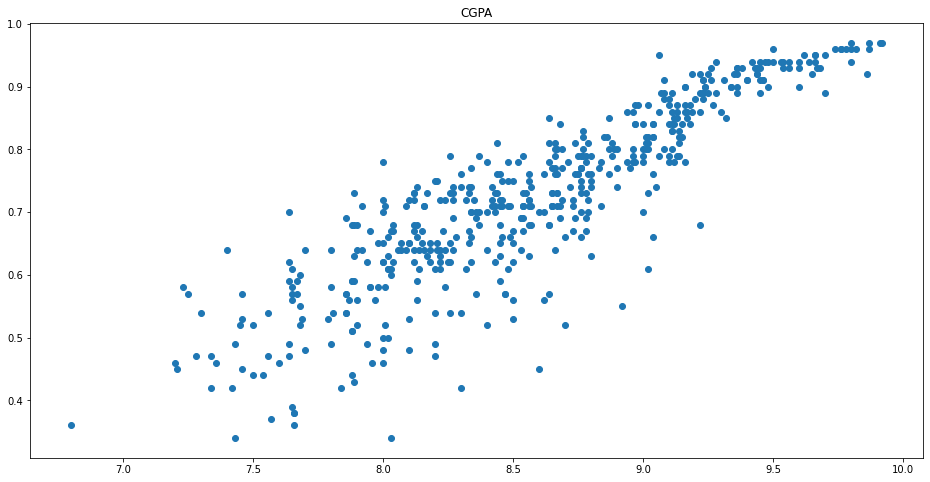

In [ ]:
x = 'CGPA'
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>Here we can see that CGPA and ChanceOfAdmit has strong positive relation.
<br></p>

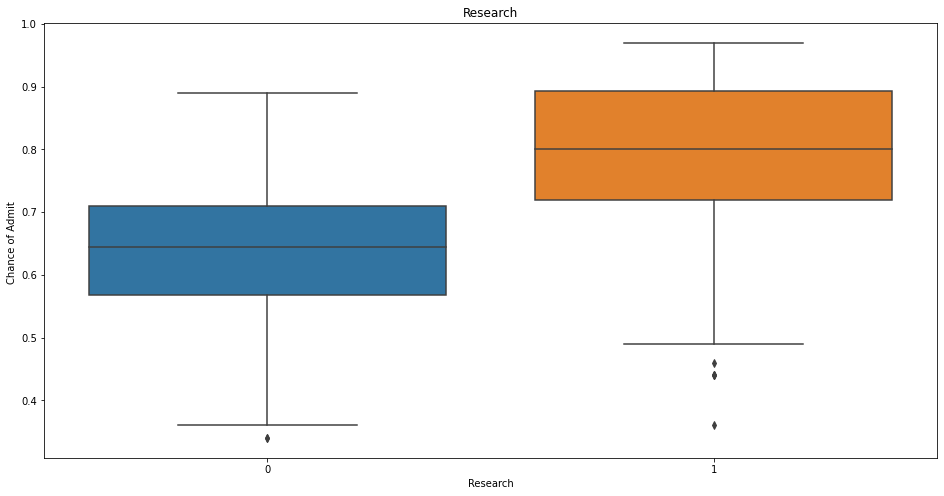

In [ ]:
x = 'Research'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

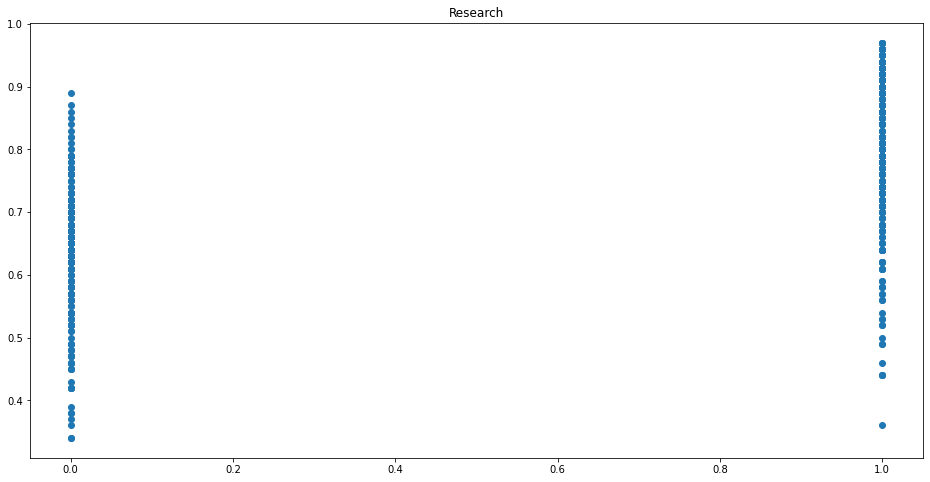

In [ ]:
x = 'Research'
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b>Since there are many outliers, we can't see any relationship between Research and ChanceOfAdmit.
<br></p>

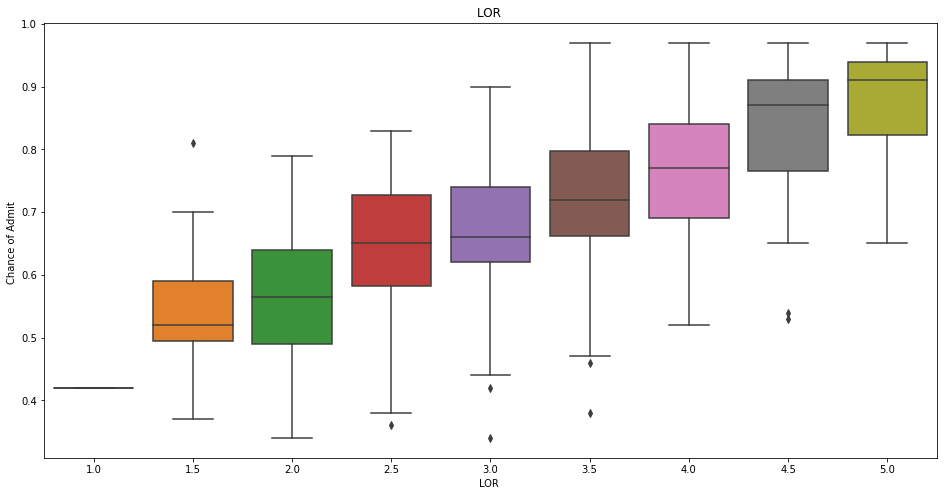

In [ ]:
x = 'LOR '
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

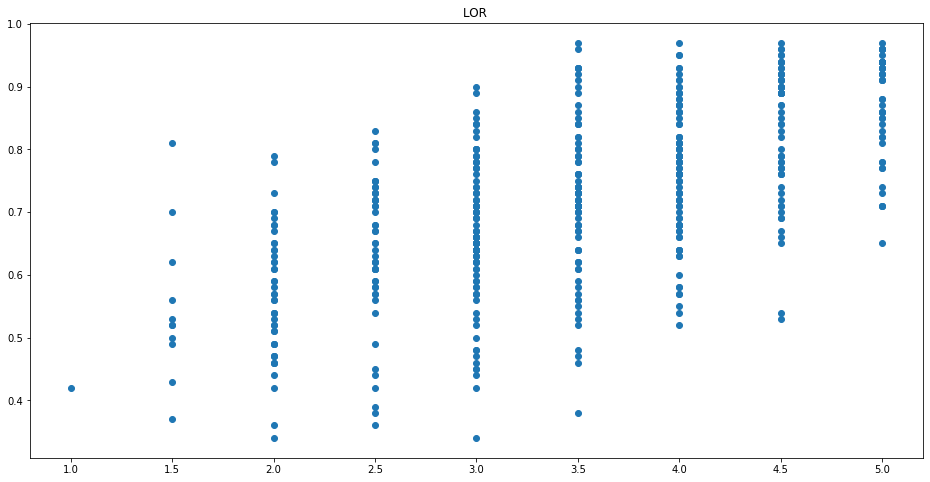

In [ ]:
x = 'LOR '
plt.figure(figsize=(16,8))
plt.scatter(x=data[x], y=data['Chance of Admit '])
plt.title(x)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;"><b>Insights:-</b> Since there are many outliers we can't be fully sure that there is a strong relationship but we can say that there is a slight positive influence between LOR and ChanceOfAdmit.
<br></p>

### **Hypothesis Testing :-**

In [ ]:
data['Admission_categories'] = 0
data.loc[(data['Chance of Admit ']>=0)&(data['Chance of Admit ']<=0.35),'Admission_categories'] = 'Low'
data.loc[(data['Chance of Admit ']>0.35)&(data['Chance of Admit ']<=0.7),'Admission_categories'] = 'Medium'
data.loc[data['Chance of Admit ']>0.7,'Admission_categories'] = 'High'

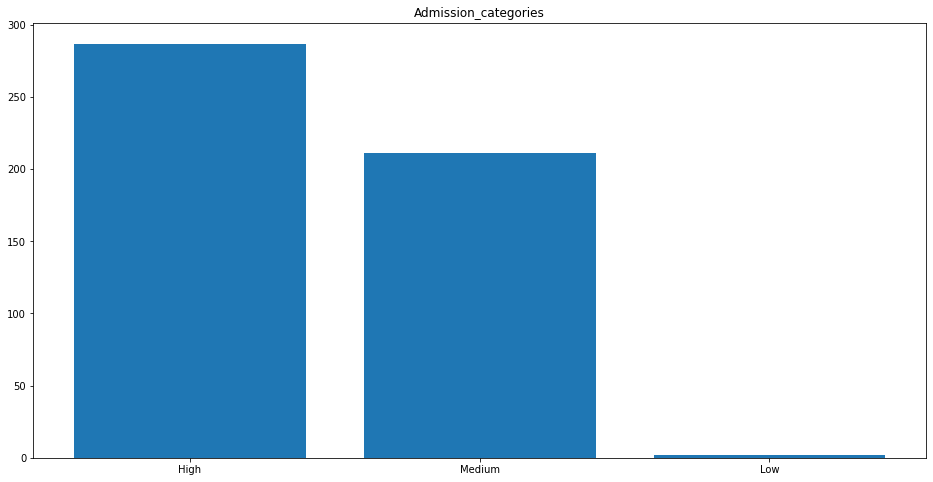

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(data['Admission_categories'].value_counts().index, data['Admission_categories'].value_counts().values.tolist())
plt.title(x)
plt.show()

#### **Does the GRE score affect the probability of getting Admission? (chi square test)**

1. H0: GREScore and Admission_categories are independent.

2. H1: GREScore and Admission_categories dependent.

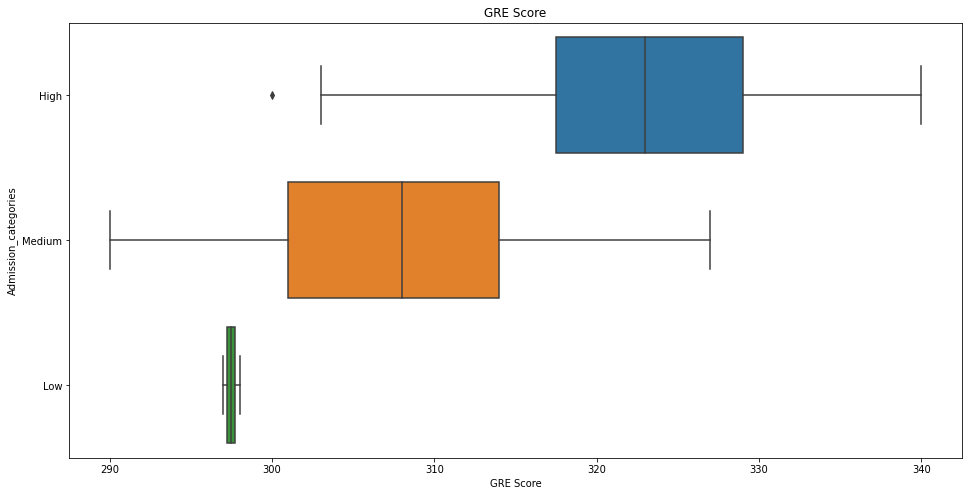

In [ ]:
x = 'GRE Score'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Admission_categories'])
plt.title(x)
plt.show()

In [ ]:
Admission_Gre = pd.crosstab(data["Admission_categories"],data["GRE Score"])
print(Admission_Gre)

GRE Score             290  293  294  295  296  297  298  299  300  301  ...  \
Admission_categories                                                    ...   
High                    0    0    0    0    0    0    0    0    1    0  ...   
Low                     0    0    0    0    0    1    1    0    0    0  ...   
Medium                  2    1    2    5    5    5    9   10   11   11  ...   

GRE Score             331  332  333  334  335  336  337  338  339  340  
Admission_categories                                                    
High                    9    8    4    8    4    5    2    4    3    9  
Low                     0    0    0    0    0    0    0    0    0    0  
Medium                  0    0    0    0    0    0    0    0    0    0  

[3 rows x 49 columns]


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 96
Expected frequencies  [[1.1480e+00 5.7400e-01 1.1480e+00 2.8700e+00 2.8700e+00 3.4440e+00
  5.7400e+00 5.7400e+00 6.8880e+00 6.3140e+00 4.0180e+00 2.8700e+00
  6.8880e+00 6.3140e+00 4.0180e+00 5.7400e+00 7.4620e+00 5.1660e+00
  6.3140e+00 9.1840e+00 1.3776e+01 6.8880e+00 9.1840e+00 7.4620e+00
  1.0332e+01 8.6100e+00 6.8880e+00 6.8880e+00 9.1840e+00 9.7580e+00
  9.7580e+00 7.4620e+00 1.3202e+01 8.6100e+00 6.8880e+00 9.7580e+00
  5.1660e+00 5.7400e+00 4.5920e+00 5.1660e+00 4.5920e+00 2.2960e+00
  4.5920e+00 2.2960e+00 2.8700e+00 1.1480e+00 2.2960e+00 1.7220e+00
  5.1660e+00]
 [8.0000e-03 4.0000e-03 8.0000e-03 2.0000e-02 2.0000e-02 2.4000e-02
  4.0000e-02 4.0000e-02 4.8000e-02 4.4000e-02 2.8000e-02 2.0000e-02
  4.8000e-02 4.4000e-02 2.8000e-02 4.0000e-02 5.2000e-02 3.6000e-02
  4.4000e-02 6.4000e-02 9.6000e-02 4.8000e-02 6.4000e-02 5.2000e-02
  7.2000e-02 6.0000e-02 4.8000e-02 4.8000e-02 6.4000e-02 6.8000e-02
  6.8000e-02 5.2000e-02 9.2000e-02 6.0000e-02 4.8000e-02

In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=119.871, stat=318.492


In [ ]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000
The variables are dependent (We reject H0)


We can see that,
- The P-value is lower than the significance level of 5%, so we can reject the null hypothesis with a confidence of 95%.
- This means, that GREScore and getting Admission are dependent with a confidence level of 95%.

#### **Does the TOEFL score affect the probability of getting Admission? (chi square test)**

1. H0: TOEFL Score and Admission_categories are independent.

2. H1: TOEFL Score and Admission_categories dependent.

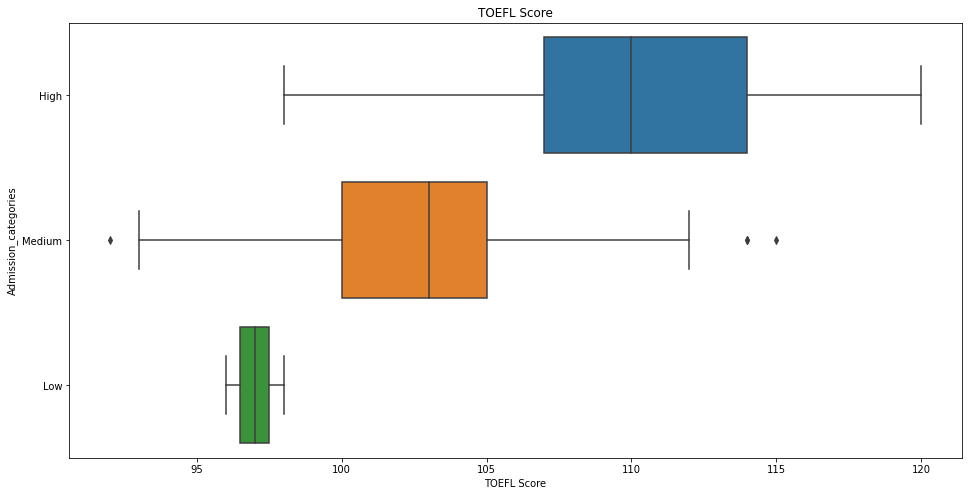

In [ ]:
x = 'TOEFL Score'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Admission_categories'])
plt.title(x)
plt.show()

In [ ]:
Admission_TOEFL = pd.crosstab(data["Admission_categories"],data["TOEFL Score"])
print(Admission_TOEFL)

TOEFL Score           92   93   94   95   96   97   98   99   100  101  ...  \
Admission_categories                                                    ...   
High                    0    0    0    0    0    0    1    3    3    3  ...   
Low                     0    0    0    0    1    0    1    0    0    0  ...   
Medium                  1    2    2    3    5    7    8   20   21   17  ...   

TOEFL Score           111  112  113  114  115  116  117  118  119  120  
Admission_categories                                                    
High                   17   27   19   16   10   16    8   10   10    9  
Low                     0    0    0    0    0    0    0    0    0    0  
Medium                  3    1    0    2    1    0    0    0    0    0  

[3 rows x 29 columns]


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 56
Expected frequencies  [[5.7400e-01 1.1480e+00 1.1480e+00 1.7220e+00 3.4440e+00 4.0180e+00
  5.7400e+00 1.3202e+01 1.3776e+01 1.1480e+01 1.3776e+01 1.4350e+01
  1.6646e+01 2.1238e+01 1.6072e+01 1.6072e+01 1.0906e+01 1.0906e+01
  2.5256e+01 1.1480e+01 1.6072e+01 1.0906e+01 1.0332e+01 6.3140e+00
  9.1840e+00 4.5920e+00 5.7400e+00 5.7400e+00 5.1660e+00]
 [4.0000e-03 8.0000e-03 8.0000e-03 1.2000e-02 2.4000e-02 2.8000e-02
  4.0000e-02 9.2000e-02 9.6000e-02 8.0000e-02 9.6000e-02 1.0000e-01
  1.1600e-01 1.4800e-01 1.1200e-01 1.1200e-01 7.6000e-02 7.6000e-02
  1.7600e-01 8.0000e-02 1.1200e-01 7.6000e-02 7.2000e-02 4.4000e-02
  6.4000e-02 3.2000e-02 4.0000e-02 4.0000e-02 3.6000e-02]
 [4.2200e-01 8.4400e-01 8.4400e-01 1.2660e+00 2.5320e+00 2.9540e+00
  4.2200e+00 9.7060e+00 1.0128e+01 8.4400e+00 1.0128e+01 1.0550e+01
  1.2238e+01 1.5614e+01 1.1816e+01 1.1816e+01 8.0180e+00 8.0180e+00
  1.8568e+01 8.4400e+00 1.1816e+01 8.0180e+00 7.5960e+00 4.6420e+00
  6.7520e+00 3.3760e+0

In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=74.468, stat=279.615


In [ ]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000
The variables are dependent (We reject H0)


We can see that,
- The P-value is lower than the significance level of 5%, so we can reject the null hypothesis with a confidence of 95%.
- This means, that TOEFL Score and getting Admission are dependent with a confidence level of 95%.

#### **Does the UniversityRating  affect the probability of getting Admission? (chi square test)**

1. H0: UniversityRating  and Admission_categories are independent.

2. H1: UniversityRating  and Admission_categories dependent.

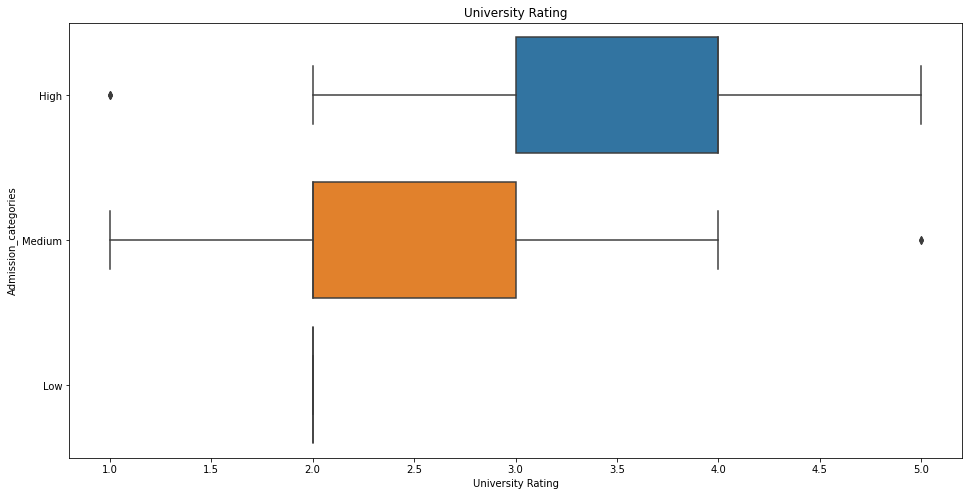

In [ ]:
x = 'University Rating'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Admission_categories'])
plt.title(x)
plt.show()

In [ ]:
Admission_ur = pd.crosstab(data["Admission_categories"],data["University Rating"])
print(Admission_ur)

University Rating      1   2   3   4   5
Admission_categories                    
High                   3  30  95  88  71
Low                    0   2   0   0   0
Medium                31  94  67  17   2


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 8
Expected frequencies  [[19.516 72.324 92.988 60.27  41.902]
 [ 0.136  0.504  0.648  0.42   0.292]
 [14.348 53.172 68.364 44.31  30.806]]


In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=15.507, stat=172.161


In [ ]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000
The variables are dependent (We reject H0)


We can see that,
- The P-value is lower than the significance level of 5%, so we can reject the null hypothesis with a confidence of 95%.
- This means, that University Rating  and getting Admission are dependent with a confidence level of 95%.

#### **Does the SOP   affect the probability of getting Admission? (chi square test)**

1. H0: SOP   and Admission_categories are independent.

2. H1: SOP   and Admission_categories dependent.

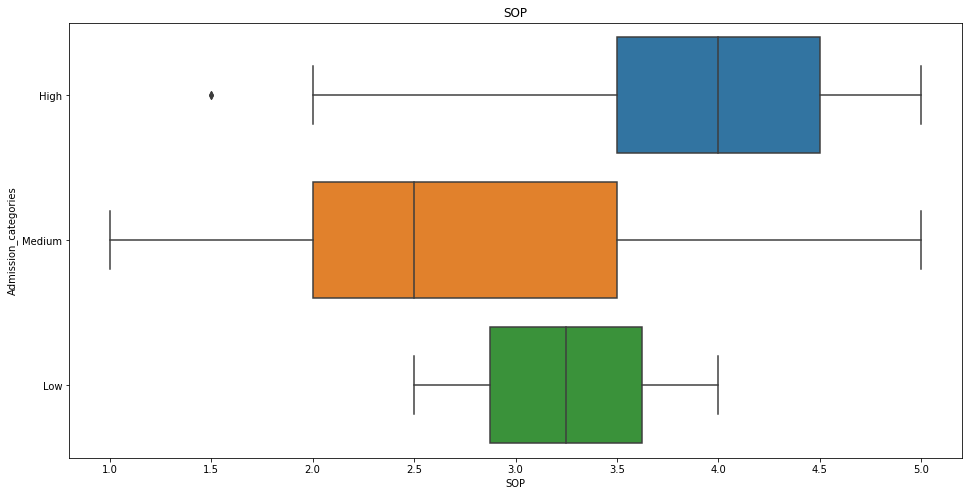

In [ ]:
x = 'SOP'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Admission_categories'])
plt.title(x)
plt.show()

In [ ]:
Admission_sop = pd.crosstab(data["Admission_categories"],data["SOP"])
print(Admission_sop)

SOP                   1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Admission_categories                                             
High                    0    2    7   17   39   53   71   58   40
Low                     0    0    0    1    0    0    1    0    0
Medium                  6   23   36   46   41   35   17    5    2


In [ ]:
stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 8
Expected frequencies  [[19.516 72.324 92.988 60.27  41.902]
 [ 0.136  0.504  0.648  0.42   0.292]
 [14.348 53.172 68.364 44.31  30.806]]


In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=15.507, stat=172.161


In [ ]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000
The variables are dependent (We reject H0)


We can see that,
- The P-value is lower than the significance level of 5%, so we can reject the null hypothesis with a confidence of 95%.
- This means, that SOP and getting Admission are dependent with a confidence level of 95%.

#### **Does the LOR affect the probability of getting Admission? (chi square test)**

1. H0: LOR and Admission_categories are independent.

2. H1: LOR and Admission_categories dependent.

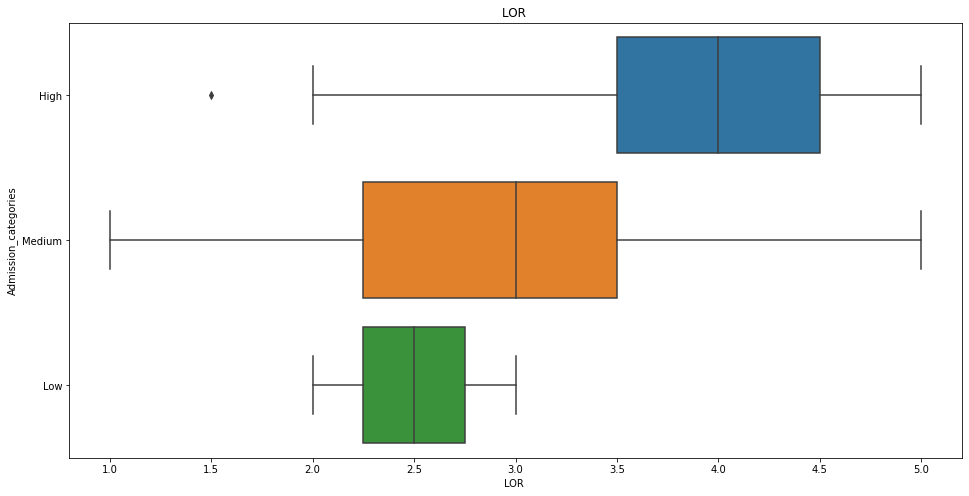

In [ ]:
x = 'LOR '
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Admission_categories'])
plt.title(x)
plt.show()

In [ ]:
Admission_lor = pd.crosstab(data["Admission_categories"],data["LOR "])
print(Admission_lor)

LOR                   1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Admission_categories                                             
High                    0    1    3   19   37   55   68   55   49
Low                     0    0    1    0    1    0    0    0    0
Medium                  1   10   42   31   61   31   26    8    1


In [ ]:
stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 8
Expected frequencies  [[19.516 72.324 92.988 60.27  41.902]
 [ 0.136  0.504  0.648  0.42   0.292]
 [14.348 53.172 68.364 44.31  30.806]]


In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=15.507, stat=172.161


In [ ]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000
The variables are dependent (We reject H0)


We can see that,
- The P-value is lower than the significance level of 5%, so we can reject the null hypothesis with a confidence of 95%.
- This means, that LOR  and getting Admission are dependent with a confidence level of 95%.

#### **Does the CGPA affect the probability of getting Admission? (chi square test)**

1. H0: CGPA and Admission_categories are independent.

2. H1: CGPA and Admission_categories dependent.

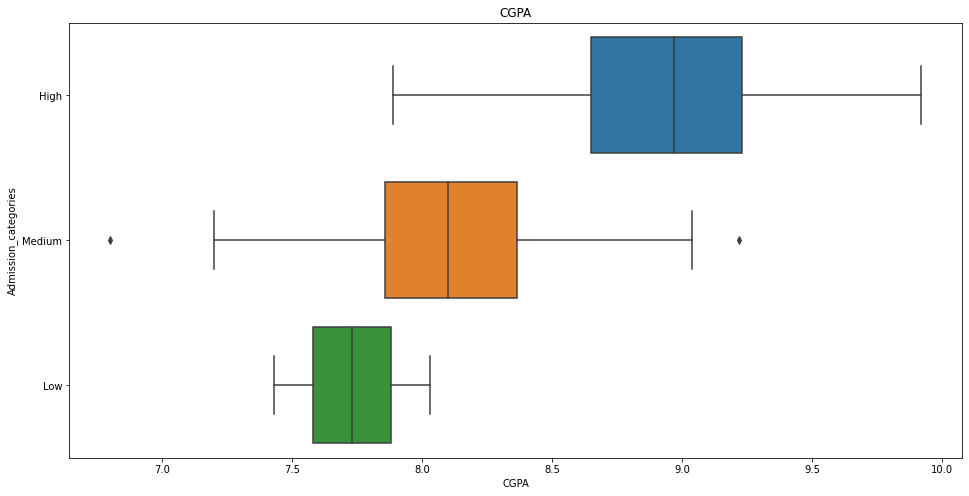

In [ ]:
x = 'CGPA'
plt.figure(figsize=(16,8))
sns.boxplot(x=data[x], y=data['Admission_categories'])
plt.title(x)
plt.show()

In [ ]:
Admission_cgpa = pd.crosstab(data["Admission_categories"],data["CGPA"])
print(Admission_cgpa)

CGPA                  6.80  7.20  7.21  7.23  7.25  7.28  7.30  7.34  7.36  \
Admission_categories                                                         
High                     0     0     0     0     0     0     0     0     0   
Low                      0     0     0     0     0     0     0     0     0   
Medium                   1     1     1     1     1     1     1     2     1   

CGPA                  7.40  ...  9.70  9.74  9.76  9.78  9.80  9.82  9.86  \
Admission_categories        ...                                             
High                     0  ...     2     1     2     1     3     1     1   
Low                      0  ...     0     0     0     0     0     0     0   
Medium                   1  ...     0     0     0     0     0     0     0   

CGPA                  9.87  9.91  9.92  
Admission_categories                    
High                     2     1     1  
Low                      0     0     0  
Medium                   0     0     0  

[3 rows x 184 col

In [ ]:
stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 8
Expected frequencies  [[19.516 72.324 92.988 60.27  41.902]
 [ 0.136  0.504  0.648  0.42   0.292]
 [14.348 53.172 68.364 44.31  30.806]]


In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=15.507, stat=172.161


In [ ]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000
The variables are dependent (We reject H0)


We can see that,
- The P-value is lower than the significance level of 5%, so we can reject the null hypothesis with a confidence of 95%.
- This means, that CGPA  and getting Admission are dependent with a confidence level of 95%.

**Conclusion -**

Through this experiment, I understood how we can use univariate and bivariate analysis to understand the relationship between attributes and also the target column. I also learned how hypothesis testing is performed and how is it useful for better understanding the fit of the data for our model/hypothesis. The most important question that we all have in our minds when reading any scientific research work is that how assumptions to any topics are made. I now understand that these forms of hypothesis testing play a mjor role in their assumptions. The same can and should be applied to research done by us in order to have a mathemti 
